##Цель проекта

В проекте мы - проанализируем данные из датасета о книгах сервиса Goodreads.

Мы определим:
1. Количество книг на разных языках
2. Распределение количества соавторов
3. Топ 10 книг с аибольшим количеством оценок
4. Топ 10 книг с наибольшим количеством отзывов
5. Топ 20 книг с самым высоким средним рейтингом
6. Книги с самым низким средним рейтингом
7. Распределение среднего рейтинга
8. Топ 10 авторов с высоким рейтингом

Датаcет, на котором мы будем делать анализ взят с сайта kaggle - https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/books.csv',  on_bad_lines='skip')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


#Подготовка данных

Посмотрим на типы данных в колонках

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Есть ли в датасете пропуски?

In [4]:
df.isna().any()

bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
  num_pages           False
ratings_count         False
text_reviews_count    False
publication_date      False
publisher             False
dtype: bool

Пропусков нет)

In [5]:
#проверим есть ли дубликаты
df.duplicated().any()

False

In [6]:
#удалим колонки, которые нам не понадобятся
df.drop(['bookID','isbn','isbn13'],axis = 1,inplace=True)

In [7]:
#в имени колонки слишком много пробелов, изменим его
df=df.rename(columns={"  num_pages": 'num_pages'})

#Разведочный анализ

##Посмотрим книг на каком языке больше всего

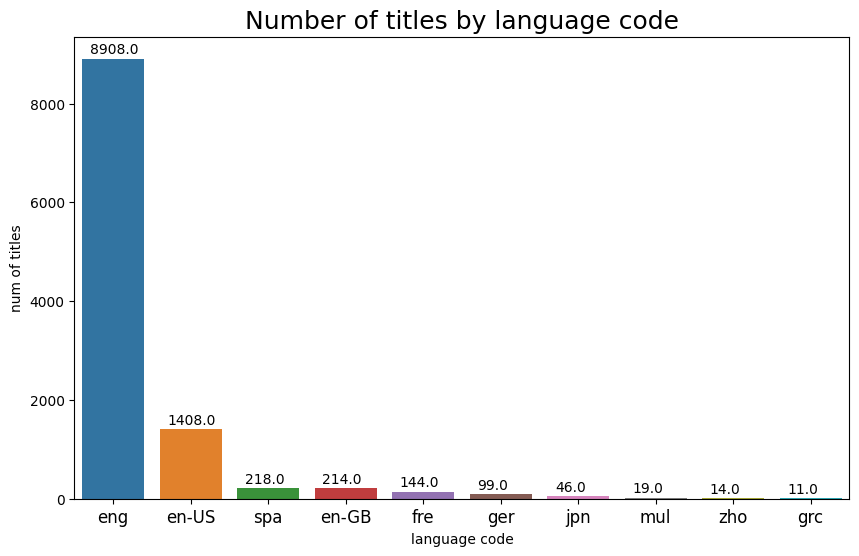

In [8]:
l_code=df.groupby('language_code')['title'].count().sort_values(ascending=False).head(10)

#построим столбчатую диаграмму и выведем значения
plt.figure(figsize = (10, 6))
ax = sns.barplot (y = l_code, x = l_code.index)
plt.title('Number of titles by language code',fontsize=18)
plt.xticks(fontsize=12)
plt.ylabel('num of titles')
plt.xlabel('language code')
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+100))

Больше всего книг на английском языке (на диаграмме их три)

In [9]:
#сосредоточимся на книгах на английском языке
df = df[(df.language_code =='eng')|(df.language_code =='eng-US')|(df.language_code =='eng-GB')]

In [10]:
#считаем количество соавторов и сгруппируем их по количеству книг
df['co-authors'] = df['authors'].apply(lambda x: x.count('/'))
#оставим первые восемь значений
co_authors_sorted=df.groupby('co-authors')['title'].count().sort_values(ascending = False).head(8)

##Книг с каким количеством соавторов больше?

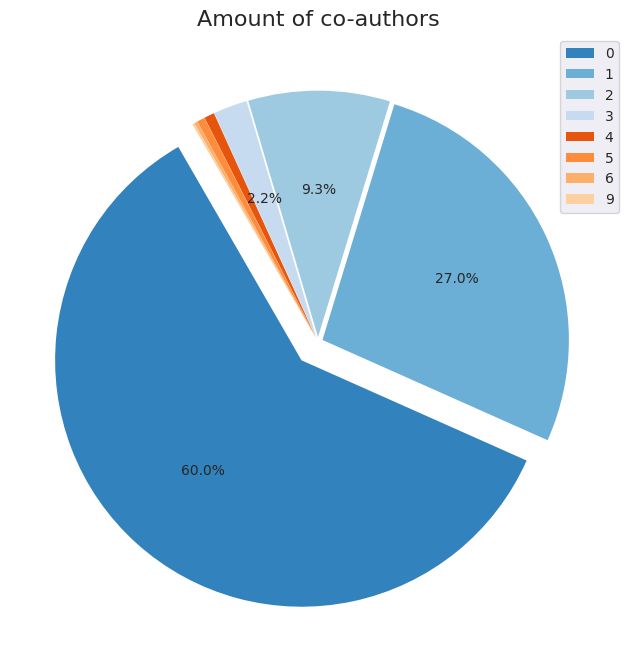

In [11]:
#выведем количество соавторов и сгруппируем по количеству книг
df['co-authors'] = df['authors'].apply(lambda x: x.count('/'))
co_authors_sorted=df.groupby('co-authors')['title'].count().sort_values(ascending = False).head(8)

# сделаем круговую диаграмму
data = co_authors_sorted.values
labels = co_authors_sorted.index

sns.set_style("darkgrid")
sns.set_palette("tab20c")
explode = [0.1 if i==0 else 0.02 for i in range(len(data))]

plt.figure(figsize = (9, 8))
plt.pie(data,
        labels=None,
        autopct = lambda p: f'{p:.1f}%' if p >= 2 else '',
        explode = explode,
        startangle = 120,
        wedgeprops=dict(edgecolor="k", linewidth=0))

plt.legend(labels, loc='upper right')
plt.title('Amount of co-authors', fontsize = 16)
plt.show()


Как мы видим из нашей круговой диаграммы больше половины книг имеют лишь одного автора и примерно 30% - двух. Доля книг с большим количеством соавторов уменьшается по мере увеличения числа соавторов.

##Топ книг с самым большим количеством оценок

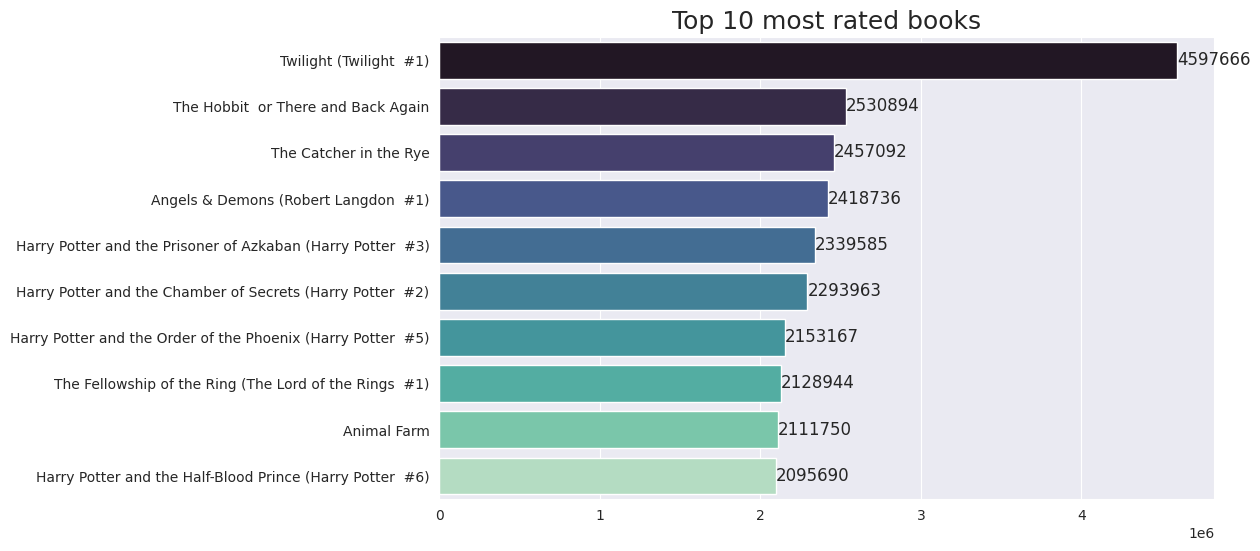

In [12]:
top_rated = df.sort_values('ratings_count',ascending=False).head(10).set_index('title')
#сделаем столбчатую диаграмму со значения
colors = sns.color_palette('mako', n_colors=len(top_rated))
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=top_rated.index, x=top_rated['ratings_count'], ax=ax, palette = colors)

ax.set_ylabel('')
ax.set_xlabel('')
plt.title("Top 10 most rated books", fontsize=18)
#выведем количество у каждого столбца
for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.5, str(round(i.get_width())), fontsize=12)

plt.show()

Как мы видим книгу "Сумерки" (первая часть) оценивали больше всего. Отрыв от второй позиции почти в два раза. Можно смело утверждать что самая популярная книга на сервисе. Следом идет Хоббит, или Туда и обратно Д.Р.Р. Толкиена и популярная среди подростков "Над пропастью во ржи". Также большой популярностьб пользуются части серии романов о Гарри Поттере.

##Топ книг с самым большим количеством рецензий

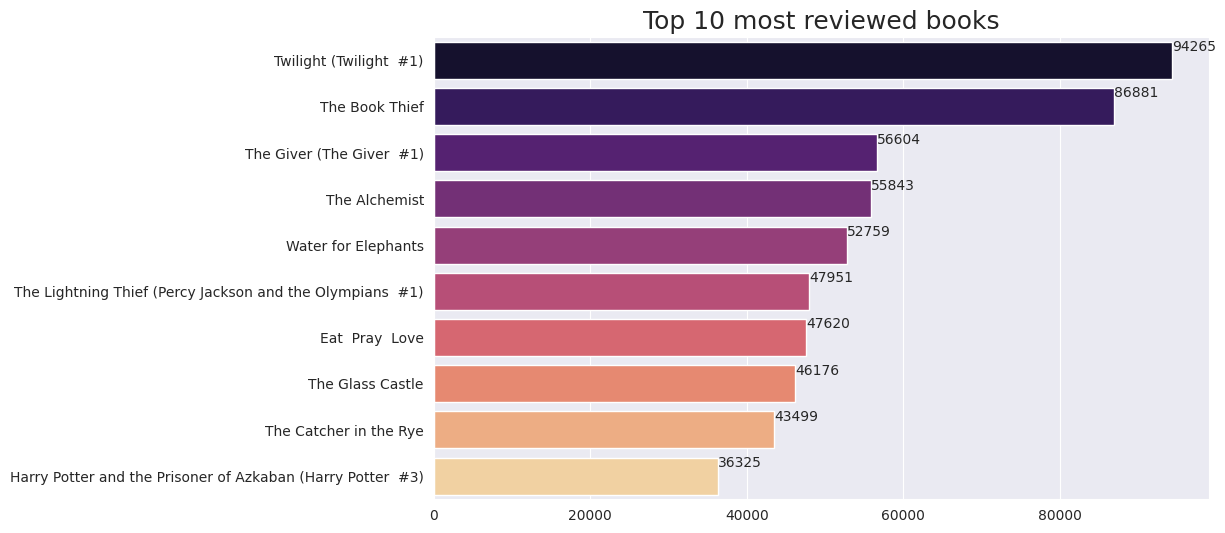

In [13]:
top_reviews = df.sort_values('text_reviews_count',ascending=False).head(10).set_index('title')

colors = sns.color_palette('magma', n_colors=len(top_reviews))
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=top_reviews.index, x=top_reviews['text_reviews_count'], ax=ax, palette = colors)

ax.set_ylabel('')
ax.set_xlabel('')
plt.title("Top 10 most reviewed books", fontsize=18)

for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.2,str(round(i.get_width())), fontsize=10)
plt.show()

Больше всего рецензии все также написано на "Сумерки". Второй идет книга "Книжный вор". Возможно рецензентов глубоко тронул сюжет книги. Далее идут "Дающий" - антиутопия, входящая в школьную программу США, Канады и Австралии и манга "Стальной алхимик".

##Топ самых высоко оцененных книг

In [14]:
#выберем первые двадцать пять с условием больше тысячи оценок
top_rating = df[df['ratings_count'] > 1000]
top_rating = top_rating.sort_values('average_rating', ascending=False).head(20).set_index('title')

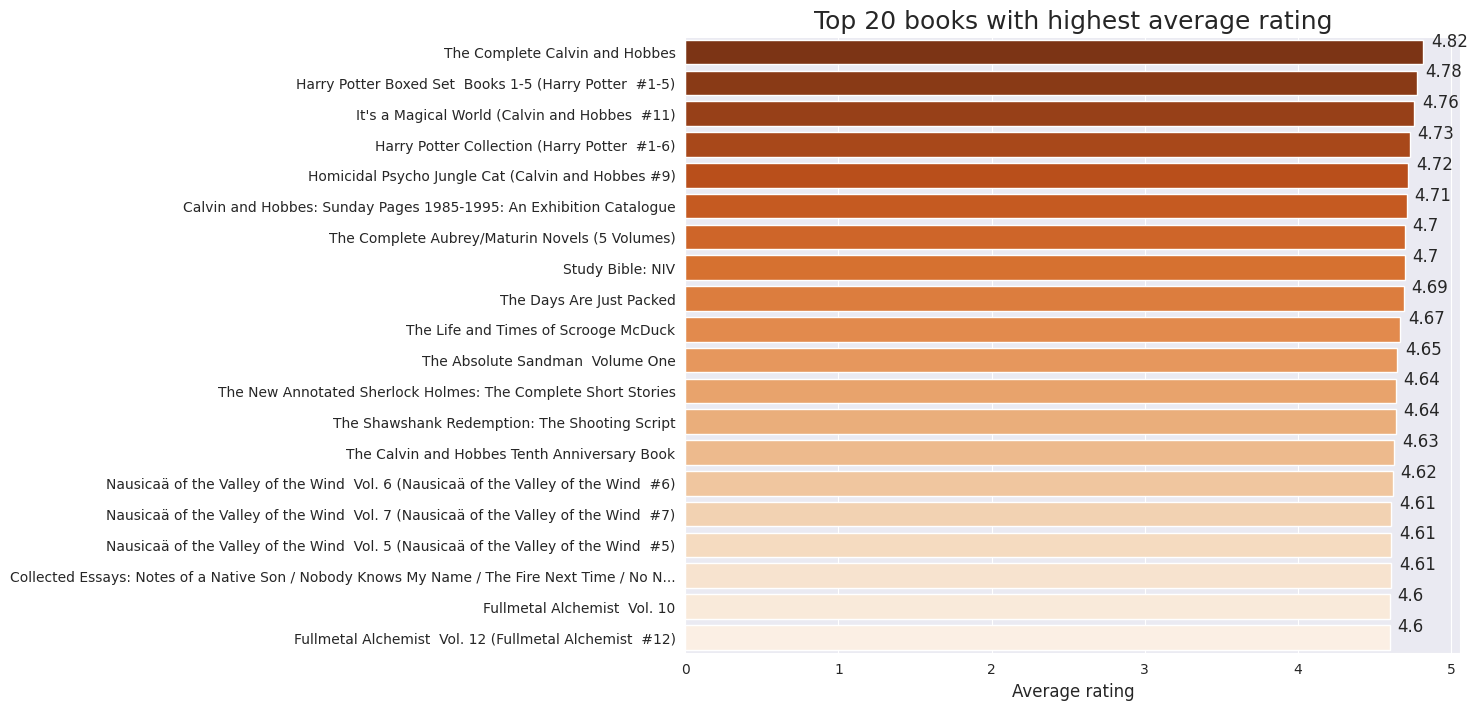

In [15]:
#построим диаграмму
#для начала сократим количество символом в названии тайтла
top_rating.index = [i[:90] + '...' if len(i) > 100 else i for i in top_rating.index]

colors = sns.color_palette('Oranges_r', n_colors=len(top_rating))
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y = top_rating.index, x = top_rating['average_rating'], ax=ax, palette = colors)

ax.set_xlabel("Average rating", fontsize=12)
ax.set_ylabel("")
ax.set_title("Top 20 books with highest average rating",fontsize=18)

for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.2,str(i.get_width()), fontsize=12)

Самую высокую среднюю оценку имеет полные сборник комиксов про Кэлвина и Хоббса. Вторым идет собрание романов о Гарри Поттере. Далее снова Кэлвин и Хоббс - на этот раз иллюстрированная книга. И наконец, полная коллекция романов о Гарри Поттере. В слову книги о Кэлвине и Хобсе появляются в топе еще по крайней мере 3 раза. В середине топ мы можем заметить Библию для начинающих. Замыкает топ манга "Стальной Алхимик".

##Посмотрим на самые низко оценненные книги

In [16]:
bottom_rating = df[df['ratings_count'] > 1000]
bottom_rating = bottom_rating.sort_values('average_rating').head(10).set_index('title')

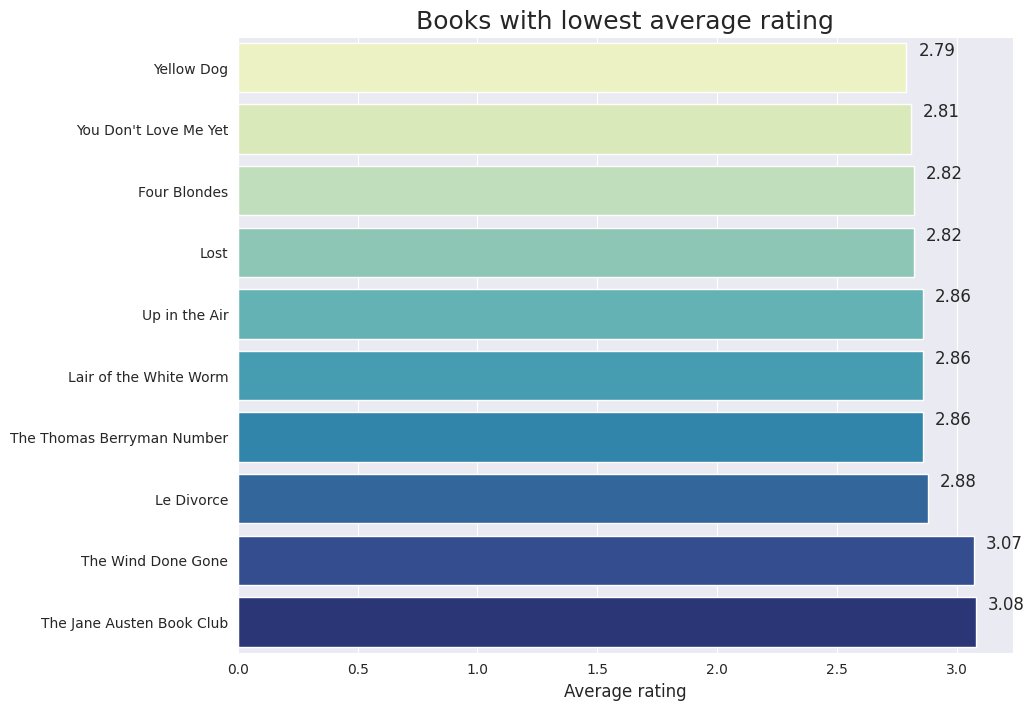

In [17]:
bottom_rating.index = [i[:100] + '...' if len(i) > 100 else i for i in bottom_rating.index]

colors = sns.color_palette('YlGnBu', n_colors=len(bottom_rating))
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(y = bottom_rating.index, x = bottom_rating['average_rating'], ax=ax, palette = colors)

ax.set_xlabel("Average rating", fontsize=12)
ax.set_ylabel("")
ax.set_title("Books with lowest average rating",fontsize=18)

for i in ax.patches:
    ax.text(i.get_width()+.05, i.get_y()+.2,str(i.get_width()), fontsize=12)

Плотность распределения среднего рейтинга

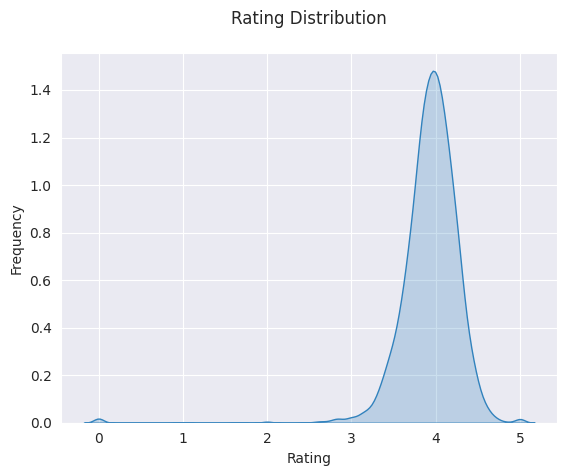

In [21]:
# ratings distribution
sns.kdeplot(df['average_rating'], shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency');

Мы видим здесь распределение близкое к нормальному. Чаще все книги имеют средний рейтинг близкий к четырем

##Книги каких авторов оценивали выше всего?

In [19]:
#посчитаем количество тайтлов со средней оценкой больше 4.5 по авторам
top_authors=df[df['average_rating']>4.5]
top_authors=top_authors.groupby('authors')['title'].count().sort_values(ascending = False).head(10)
top_authors

authors
Hiromu Arakawa/Akira Watanabe                                                 11
Bill Watterson                                                                 7
Jane Austen                                                                    4
J.R.R. Tolkien                                                                 4
J.K. Rowling                                                                   4
J.K. Rowling/Mary GrandPré                                                     3
Cook's Illustrated Magazine                                                    3
Hayao Miyazaki/Matt Thorn/Kaori Inoue/Joe Yamazaki/Walden Wong/Izumi Evers     3
Arthur Conan Doyle/Leslie S. Klinger                                           2
Christina Scull/Wayne G. Hammond                                               2
Name: title, dtype: int64

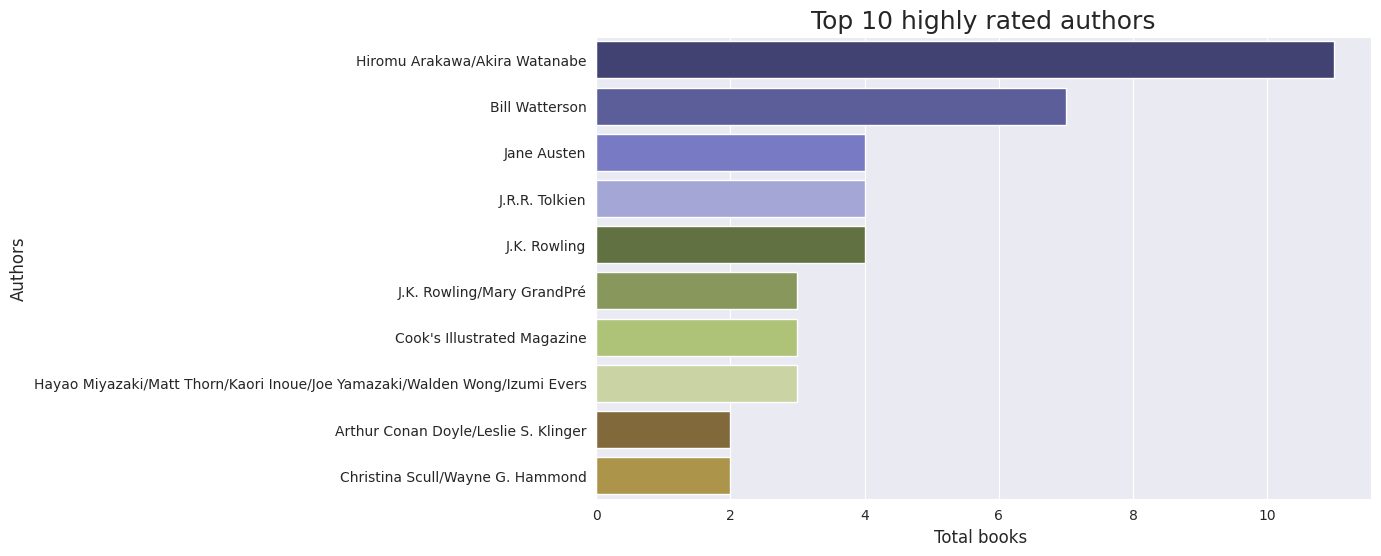

In [20]:
#построим диаграмму
colors = sns.color_palette('tab20b', n_colors=len(top_authors))
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y = top_authors.index, x = top_authors, ax=ax, palette = colors)

ax.set_xlabel("Total books ", fontsize=12)
ax.set_ylabel("Authors", fontsize=12)
ax.set_title("Top 10 highly rated authors",fontsize=18)

plt.show()

Как мы видим больше всего книг с высоким средним рейтингом написаны Хирому Аракава и Акирой Ватанабе - авторами великолепной манги Стальной алхимик. Следом за ними - Билл Уотерсон, автор комиксов про «Кельвина и Хоббса» - шестилетнего мальчика Кальвина и его плюшевого тигра Хоббса. Следом идут Джейн Остин, Джон Толкиен и Джоан Роулинг.